# Discretization

This demo shows the effect of the sampling time in the different discretization methods on zero-pole plots and bode-plots. In each of the parts below, one specific discretization method is used and visualised. You just have to run the code by pressing 'Shift'+'Enter' (but first you have to run this cell to import the necessary packages).

In [1]:
%matplotlib inline
from IPython.html.widgets import *
from Discretization import *

# Forward Euler

The *forward euler method* is based on the approximation of the integral by holding the value of the beginning of the interval for the entire time interval.<img src="f_euler.png" height="250" width="250">
Numerically, this method subsitutes every s in the continuous-time transfer function to $$s \leftarrow \frac{z-1}{T_s},$$ where $T_s$ is the sampling time.<br\>
**Stability**: the left half-plane in continuous-time (stable) is projected on the following part of the plane: <img src="F_euler_stability.png" height="250" width="250">
This way, the system may become unstable.

In [ ]:
def draw(Ts):
    sysd=sys.sample(Ts,'euler')
    draw_bode(sys,sysd,None,Ts)
    draw_zp(sys,sysd)
    step_response(sys,sysd,Ts)

go = False
while go == False:
    Num,Denom = init()
    sys = TransferFunction(Num,Denom)
    print 'The transfer function is :', sys
    go = check()
Ts1,Ts2,Ts_step = getTs()
interact(draw,Ts=(Ts1,Ts2,Ts_step))
#### If you want a different interval for the sampling time, comment out the 2 lines above, and use the following line:
#interact(draw,Ts=(a,b,c)) #enter for a and b the interval and for c the step

# Backward Euler

The *backward euler method* is based on the approximation of the integral by holding the value of the end of the interval for the entire time interval.<img src="b_euler.png" height="250" width="250">
This method substitutes every s in the continuous-time transfer function with $$s \leftarrow \frac{z-1}{T_s z},$$ where $T_s$ is the sampling time.<br\>
**Stability**: the left half-plane in continuous-time (stable) is projected on the following part of the plane: <img src="B_euler_stability.png" height="250" width="250">
This way, the system is conservative and has a lot of distorion. Also, the number of degrees of freedom decreases.

In [ ]:
def draw(Ts):
    sysd=sys.sample(Ts,'backward_diff')
    draw_bode(sys,sysd,None,Ts)
    draw_zp(sys,sysd)
    step_response(sys,sysd,Ts) 

go = False
while go == False:
    Num,Denom = init()
    sys = TransferFunction(Num,Denom)
    print 'The transfer function is :', sys
    go = check()
Ts1,Ts2,Ts_step = getTs()
interact(draw,Ts=(Ts1,Ts2,Ts_step))
#### If you want a different interval for the sampling time, comment out the 2 lines above, and use the following line:
#interact(draw,Ts=(a,b,c)) #enter for a and b the interval and for c the step

# Bilinear transform

The *bilinear transform* without prewarping is based on the approximation of the integral by holding the average of the value of the beginning of the interval and the value of the end of the interval for the entire time interval.<img src="bilinear.png" height="330" width="330">
Numerically, this method subsitutes every s in the continuous-time transfer function to $$s \leftarrow \frac{2}{T_s} \frac{z-1}{z+1},$$ where $T_s$ is the sampling time.<br\>
**Stability**: the left half-plane in continuous-time (stable) is projected on the following part of the plane: <img src="bilinear_stability.png" height="250" width="250">
This way, the system is mapped unambiguously into the unit circle. There is still some distortion, because the entire $j\omega$ axis is compressed into the $2\pi$ length of the unit circle. <br\><br\>

For the *bilinear transform with prewarping* (and prewarping frequence $\omega_0$), every s is substituted with $$\frac{\omega_0}{tan\Big(\frac{\omega_0T_s}{2}\Big)} \frac{z-1}{z+1}.$$ This method is used when you are interested in a certain frequency.

The continuous-time transfer function is : 
       1
---------------
s^2 + 0.1 s + 1

and the discrete-time transfer function is:  
4.997e-05 z + 4.997e-05
-----------------------
 z^2 - 1.999 z + 0.999

dt = 0.01



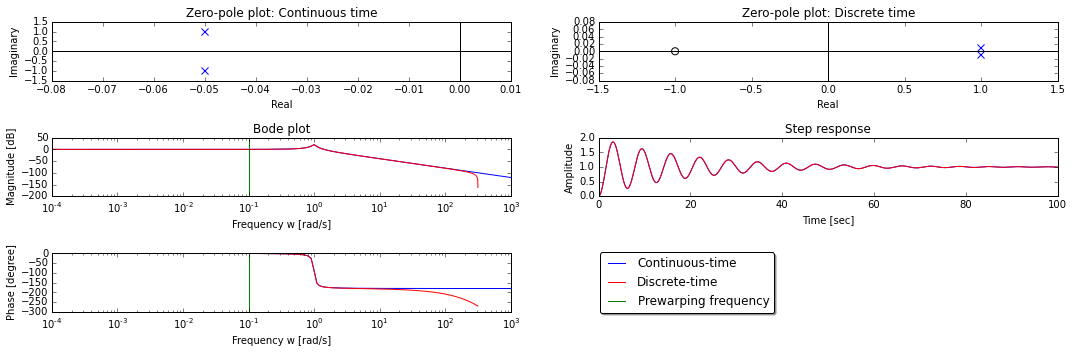

In [2]:
def draw(Ts):
    if f == 0:
        sysd = sys.sample(Ts,'bilinear')
        draw_bode(sys,sysd,None,Ts)
    else:
        sysd = find_sysd_prew(sys,f,Ts)
        draw_bode(sys,sysd,f,Ts)
    draw_zp(sys,sysd)
    step_response(sys,sysd,Ts)
    
go = False
while go == False:
    Num,Denom = init()
    sys = TransferFunction(Num,Denom)
    print 'The transfer function is :', sys
    go = check()
prew = None
while prew != 'Y' and prew != 'y' and prew != 'N' and prew != 'n':
    prew = raw_input('With prewarping? (Y/N) ')
if prew == 'Y' or prew == 'y':
    f = raw_input('What is the prewarping frequency?')
else:
    f = 0
Ts1,Ts2,Ts_step = getTs()
interact(draw,Ts=(Ts1,Ts2,Ts_step))
#### If you want a different interval for the sampling time, comment out the 2 lines above, and use the following line:
#interact(draw,Ts=(a,b,c)) #enter for a and b the interval and for c the step

# Impulse invariant method

For the *impulse invariant method*, you need to take the Partial Fraction Decomposition of the continuous-time transfer function, and each of the terms has to be converted using the next table:<br />

  |$H_c(s)$                     | $H_d(z)$                                     |
  |:------------------------------:|:--------------------------------------------:|
  |$\qquad \frac{c}{s-b} \qquad$              | $\qquad \frac{T_scz}{z-a} \qquad$                          |
  |$\qquad \frac{c}{(s-b)^2} \qquad \qquad$          | $\qquad \frac{T_scaz}{(z-a)^2} \qquad$                     |
  |$\qquad \frac{c}{(s-b)^3} \qquad \qquad$          | $\qquad \frac{T_s^3c(az^2+a^2z)}{2(z-a)^3} \qquad$         |
  |$\qquad \frac{c}{(s-b)^4} \qquad \qquad$          | $\quad \frac{T_s^4c(az^3+4a^2z^2+a^3z)}{6(z-a)^4} \qquad \quad$ |
where $a = e^{bT_s}$.<br\>
This method is used when you want the discrete-time system to have the same impulse response as the continuous-time system at the sampling instants.

In [ ]:
def draw(Ts):
    sysd=find_sysd_impulse(Ts,sys)
    draw_bode(sys,sysd,None,Ts)
    draw_zp(sys,sysd)
    step_response(sys,sysd,Ts) 

go = False
while go == False:
    Num,Denom = init()
    sys = TransferFunction(Num,Denom)
    print 'The transfer function is :', sys
    go = check()
Ts1,Ts2,Ts_step = getTs()
interact(draw,Ts=(Ts1,Ts2,Ts_step))
#### If you want a different interval for the sampling time, comment out the 2 lines above, and use the following line:
#interact(draw,Ts=(a,b,c)) #enter for a and b the interval and for c the step

# Step invariant method

For the *step invariant method*, the discrete-time transfer function is calculated as follows:
$$H_c(s)=(1-z^{-1})\mathcal{Z}\Big\{\frac{H(s)}{s}\Big\}.$$
This method is used when you want the discrete-time system to have the same step response as the continuous-time system at the sampling instants.

In [ ]:
def draw(Ts):
    sysd=sys.sample(Ts,'zoh')
    draw_bode(sys,sysd,None,Ts)
    draw_zp(sys,sysd)
    step_response(sys,sysd,Ts) 

go = False
while go == False:
    Num,Denom = init()
    sys = TransferFunction(Num,Denom)
    print 'The transfer function is :', sys
    go = check()
Ts1,Ts2,Ts_step = getTs()
interact(draw,Ts=(Ts1,Ts2,Ts_step))
#### If you want a different interval for the sampling time, comment out the 2 lines above, and use the following line:
#interact(draw,Ts=(a,b,c)) #enter for a and b the interval and for c the step

# Zero-pole matching

In *zero-pole matching*, for every pole $s = -a$ in the continuous-time transfer function, there is a pole $z=e^{-aT_s}$ in discrete time. Similarly, for every zero $s=-b$, there is a zero $z=e^{-bT_s}$ and for every zero $s=\infty$, there is a zero $z=-1$. The gain is calculated by demanding the following: $|H_c(s=0)| = |H_d(z=1)|$.

In [ ]:
def draw(Ts):
    sysd = find_sysd_matched(Ts,sys)
    draw_bode(sys,sysd,None,Ts)
    draw_zp(sys,sysd)
    step_response(sys,sysd,Ts) 

go = False
while go == False:
    Num,Denom = init()
    print 'n/d: ', Num, Denom
    sys = TransferFunction(Num,Denom)
    print 'The transfer function is :', sys
    go = check()
Ts1,Ts2,Ts_step = getTs()
interact(draw,Ts=(Ts1,Ts2,Ts_step))
#### If you want a different interval for the sampling time, comment out the 2 lines above, and use the following line:
#interact(draw,Ts=(a,b,c)) #enter for a and b the interval and for c the step